<h2 style="color:green" align='center'>Assignment-3 </h2>
<h2 style="color:green" align='center'>Data Cleaning and Data Visualization</h2>

**Project Summary:**

The Objective of this project is to clean AirBnb and HR dataset and visualize it using various plots and charts available in matplotlip, seaborn 

**Data cleaning** is the first step of data analysis which helps us to remove or modify data which is missing, incorrect, irrelavent, incomplete, improper formatted or duplicated.

**Data Visualization** helps to understand the data more clearly as it represents data in graphical format using plots,graphs and various charts

In [231]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<h2 style="color:green" align=center>Cleaning AirBnb dataset</h2>

In [232]:
#creating DataFrame using Airbnb dataset
air_bnb_df = pd.read_csv("Airbnb Dataset 19.csv")

**`head()` function in pandas is used to display first 5 rows of the dataframe**

In [233]:
air_bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


**`info()` is function in pandas which helps to understand the data, it gives us column names,no of total columns,how many total entries and how many non null entries in each column**

In [234]:
air_bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

**From the above output we can come to an know that there are total of 249 entries, 
however "last_review" and "reviews_per_month" column has only 242 non null entries
which means these 2 columns has 7 null entries**

**`drop()` function is used to drop the rows or columns in the pandas dataframe**

In [235]:
# deleting unwanted columns which is not needed for our analysis
drop = ["host_name","latitude","longitude","last_review"]
air_bnb_df.drop(drop,inplace=True,axis=1)

In [236]:
air_bnb_df.head(5)

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


**`isnull()` function used to check and manage null values. `isnull().sum()` gives sum of all null values in each column** 

In [237]:
air_bnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 7
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Filling missing values**

**`fillna()` function is used for filling the missing values with the specified value**

In [238]:
air_bnb_df.fillna({'reviews_per_month': 0},inplace=True)

In [239]:
air_bnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**To find any duplicated values present in dataset**

**`duplicated()` function used to check any duplicate values present in dataset. `duplicated().sum()` gives the sum of duplicated values present in dataset.**

In [240]:
air_bnb_df.duplicated().sum()

0

**`describe()` function gives us the statistical data**

In [246]:
air_bnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,31376.771084,1.499884e+05,143.971888,8.718876,103.445783,1.060964,1.738956,198.538153
std,18101.018309,4.010393e+05,91.442975,20.398680,100.337887,1.002393,1.234635,126.048056
min,2539.000000,2.787000e+03,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,15711.000000,5.014800e+04,85.000000,2.000000,21.000000,0.260000,1.000000,75.000000
50%,28321.000000,9.779700e+04,125.000000,3.000000,73.000000,0.770000,1.000000,225.000000
75%,46911.000000,1.936370e+05,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,62430.000000,6.197784e+06,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


**Now AirBnb dataset cleaning is complete after removing unwanted columns and filling missing values with 0**

**Once data cleaning is done we can procceed with data visualization**

In [244]:
air_bnb_df.neighbourhood_group = air_bnb_df.neighbourhood_group.astype('category')

In [201]:
air_bnb_df.neighbourhood_group.cat.categories

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object')

In [202]:
pd.crosstab(air_bnb_df.neighbourhood_group,air_bnb_df.room_type)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,0,2,0
Brooklyn,58,53,0
Manhattan,71,51,2
Queens,5,6,0
Staten Island,0,1,0


<h2 style="color:green" align=center>AirBnb dataset data visualization</h2>

<h2 align=center>neighbourhood group </h2>

**To find the percentage of total number of rooms in each neighbourhood group**

**`PIE CHART`** are circular charts divided up into segments which each represent a value

([<matplotlib.patches.Wedge at 0x1df8a4e7760>,
 [Text(0.010408763965148692, 1.649967168652976, 'Bronx'),
  Text(-0.3001767284636508, -1.6224653869000905, 'Brooklyn'),
  Text(1.9053174954733219, -0.4150484808347908, 'Manhattan'),
  Text(1.8476445768242518, -0.09332479698307172, 'Queens'),
  Text(1.7498607173999905, -0.022078716004139416, 'Staten Island')],
 [Text(0.00567750761735383, 0.8999820919925322, '50%'),
  Text(-0.16373276098017314, -0.8849811201273219, '45%'),
  Text(1.1725030741374287, -0.2554144497444866, '4%'),
  Text(1.0985994781117172, -0.055490419827772364, '1%'),
  Text(0.9999204099428515, -0.012616409145222524, '0%')])

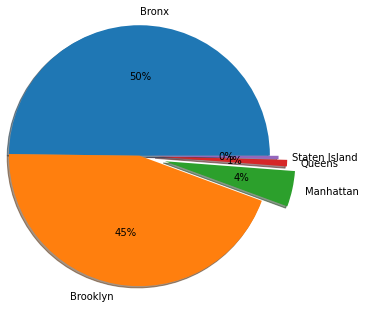

In [261]:
value = air_bnb_df.neighbourhood_group.value_counts()
label = air_bnb_df.neighbourhood_group.cat.categories

plt.pie(value,labels=label,autopct="%0.0f%%",radius=1.5,explode=[0,0,0.3,0.2,0.1],shadow=True)

<h2 align=center>neighbourhood group Vs room type</h2>

**To find the total number of rooms (Private,Entire Home, Shared room) in each neighbourhood group**

I am using countplot and histplot --- > both will give us the count of rooms of each time in each neighbourhood group

**`countplot`** used to represent the occurrence(counts) of the observation present in the categorical variable

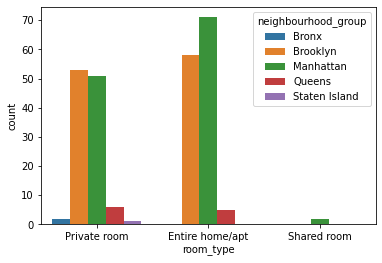

In [203]:
count = sns.countplot(x=air_bnb_df.room_type,hue=air_bnb_df.neighbourhood_group)
sns.move_legend(count,"upper right")

Bronx has 2 Private room

Brooklyn has 53 Private room and 58 Entire home

Manhattan has 51 Private room, 71 Entire home and 1 Shared room

Quees has 6 Private room , 5 Entire home

Staten Island has 1 Private room

**Same analysis can also be done by histplot** 

**`Histogram`** represents the number of obersvations within each given interval

<AxesSubplot:xlabel='room_type', ylabel='Count'>

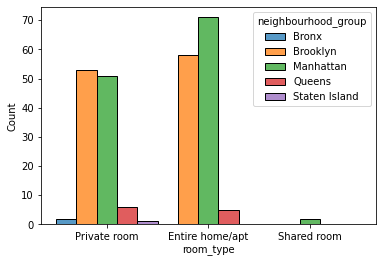

In [263]:
sns.histplot(data=air_bnb_df,x=air_bnb_df.room_type,hue=air_bnb_df.neighbourhood_group,multiple="dodge")

**OBSERVATION**

using above count plot and histplot we can say like , 

**Entire Room/apartments**

manhattan has higher number of apartments compared to other places also bronx and Staten Island does not have any apartment.

**Private Room**

Brooklyn has higher number of private room and Staten Island has less private room

**Shared room**

Totally only 1 shared room is available in Manhattan

<h2 align=center>Room type Vs Price</h2>

**To find which type of room is costlier**

<AxesSubplot:xlabel='room_type', ylabel='price'>

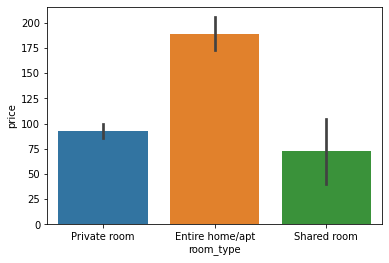

In [264]:
sns.barplot(x=air_bnb_df.room_type,y=air_bnb_df.price,data=air_bnb_df)

**OBSERVATION**

Apartment are more costlier than single room and shared room are cheaper when compared to apartments and single room

<h2 align=center>Neighbourhood group Vs Price</h2>

**To find which neighbourhood has costlier room**

**catplot** - Categorical plots show the relationship between a numerical and one or more categorical variables.

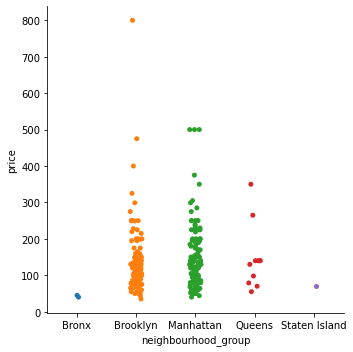

In [206]:
#catplot room type and price
sns.catplot(x='neighbourhood_group',y='price',data=air_bnb_df)

**OBSERVATION**

brooklyn has costlier rooms and apartments.

<h2 align=center>Neighbourhood group Vs Price Vs room type</h2>

**To find which room type is costlier in which neighbourhood**


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

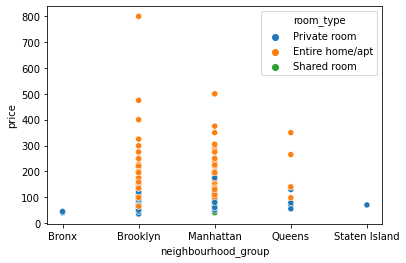

In [207]:
sns.scatterplot(x='neighbourhood_group',y='price',hue='room_type',data=air_bnb_df)

**OBSERVATION**

Apartment is costlier in Brooklyn and single room is costlier in Manhattan

<h2 align=center>neighbourhood_group Vs availability_365</h2>

**To find rooms availability in each neighbourhood group**

<AxesSubplot:xlabel='neighbourhood_group', ylabel='availability_365'>

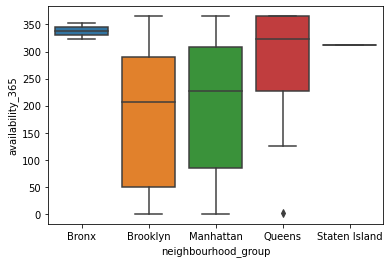

In [208]:
sns.boxplot(x='neighbourhood_group',y='availability_365',data=air_bnb_df)

**OBSERVATION**

Availability of room in manhattan is higher compared to other 

**AirBnb Dataset CONCLUSION**

manhattan has higher number of apartments and Brooklyn has higher number of private rooms compared to other places.Apartment are more costlier than single room and shared room are cheaper when compared to apartments and single room. brooklyn has costlier rooms and apartments.Apartment is costlier in Brooklyn and single room is costlier in Manhattan.Availability of room in manhattan is higher compared to other

<h2 style="color:green" align=center>Cleaning HR dataset</h2>

In [209]:
hr_df = pd.read_csv('HRDataset_v14.csv')
hr_df.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [210]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [211]:
hr_df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [212]:
drop = ['MarriedID','MaritalStatusID','GenderID','FromDiversityJobFairID','EmpStatusID','DeptID','Termd','PositionID','Zip','HispanicLatino','DateofHire','DateofTermination','ManagerID']
hr_df.drop(drop,inplace=True,axis=1)

In [213]:
hr_df.isnull().sum()

Employee_Name                 0
EmpID                         0
PerfScoreID                   0
Salary                        0
Position                      0
State                         0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
RaceDesc                      0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerformanceReview_Date    0
DaysLateLast30                0
Absences                      0
dtype: int64

In [214]:
hr_df.duplicated().sum()

0

<h2 style="color:green" align=center>HR dataset data visualization</h2>

<h2 align=center>Gender</h2>

**To find which gender (Female or Male) is more in this company**

<AxesSubplot:xlabel='Sex', ylabel='count'>

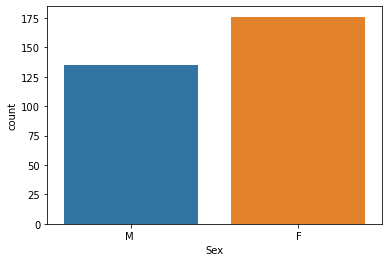

In [215]:
sns.countplot(x=hr_df.Sex,data=hr_df)

**OBSERVATION**

Most of the employee is female

<h2 align=center>Gender Vs Salary</h2>

**To find which gender (Female or Male) get more salary**

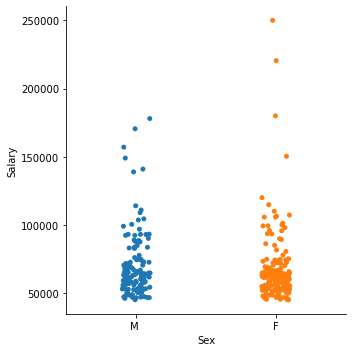

In [216]:
sns.catplot(x='Sex',y='Salary',data=hr_df)

**OBSERVATION**

Few Female employees get more salary

<h2 align=center>Department</h2>

**To find which department has more employee**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Production       '),
  Text(1, 0, 'IT/IS'),
  Text(2, 0, 'Software Engineering'),
  Text(3, 0, 'Admin Offices'),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Executive Office')])

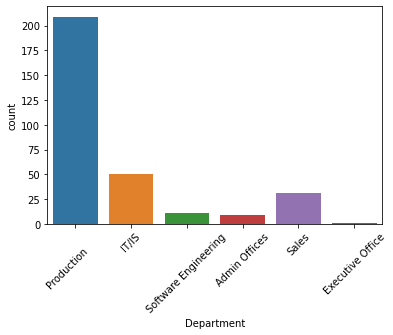

In [217]:
sns.countplot(x=hr_df.Department,data=hr_df)
plt.xticks(rotation=45)

**OBSERVATION**

Most of the employees belongs to prouction department

<h2 align=center>Department Vs Salary</h2>

**To find which department employees get more salary**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Production       '),
  Text(1, 0, 'IT/IS'),
  Text(2, 0, 'Software Engineering'),
  Text(3, 0, 'Admin Offices'),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Executive Office')])

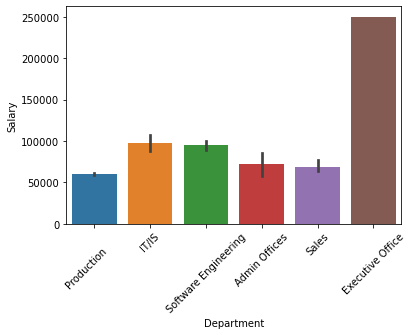

In [218]:
sns.barplot(x='Department',y='Salary',data=hr_df)
plt.xticks(rotation=45)

**OBSERVATION**

Though Production has more employees, salary for them is less compared to other departments also employee in executive office is less but their salary is high

<h2 align=center>EmploymentStatus Vs Salary</h2>

**To find which department employees get more salary**

<AxesSubplot:xlabel='EmploymentStatus', ylabel='Salary'>

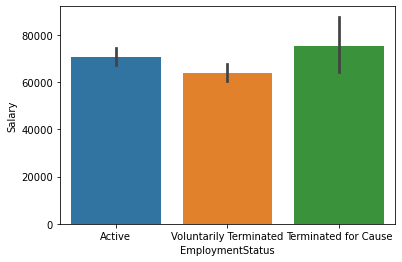

In [219]:
sns.barplot(x='EmploymentStatus',y='Salary',data=hr_df)

**OBSERVATION**

Voluntarily Terminated Employees has less salary

<h2 align=center>PerformanceScore</h2>

**To find what is the most PerformanceScore of employees**

<AxesSubplot:xlabel='PerformanceScore', ylabel='count'>

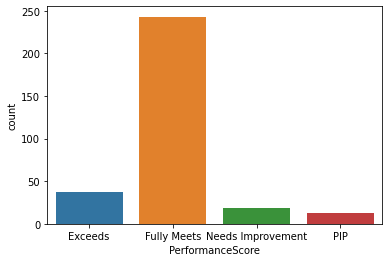

In [220]:
sns.countplot(x=hr_df.PerformanceScore)

**OBSERVATION**

Most of the employees performance is "Fully Meets"

<h2 align=center>Salary</h2>

**To find distribution of salary**

C:\Users\SGANGAD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Salary', ylabel='Density'>

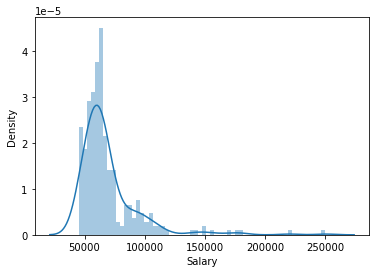

In [268]:
sns.distplot(hr_df.Salary,bins=60)

**OBSERVATION**

Most of the employees salary is between 50K to 1L

<h2 align=center>PerformanceScore Vs Department</h2>

**To find which performance of each department**

In [221]:
px.bar(hr_df,x='Department',color='PerformanceScore')

<h2 align=center>EmpSatisfaction Vs PerformanceScore</h2>

**To find how employee satisfactions affects performance**

<AxesSubplot:xlabel='PerformanceScore', ylabel='EmpSatisfaction'>

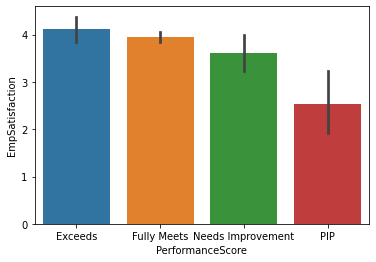

In [222]:
sns.barplot(data=hr_df,x='PerformanceScore',y='EmpSatisfaction')

**OBSERVATION**

Highly Satisfied employee performs well

<h2 align=center>Department Vs EmpSatisfaction</h2>

**To find which department employees are more satistied**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Production       '),
  Text(1, 0, 'IT/IS'),
  Text(2, 0, 'Software Engineering'),
  Text(3, 0, 'Admin Offices'),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Executive Office')])

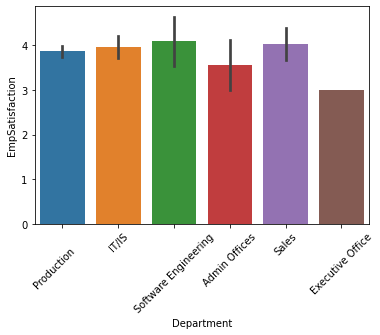

In [223]:
sns.barplot(x='Department',y='EmpSatisfaction',data=hr_df)
plt.xticks(rotation=45)

**OBSERVATION**

Executive Office department are tha most unsatisfied department

<h2 align=center>EmpSatisfaction Vs Salary</h2>

**To know how employee satisfaction affects salary**

<AxesSubplot:xlabel='EmpSatisfaction', ylabel='Salary'>

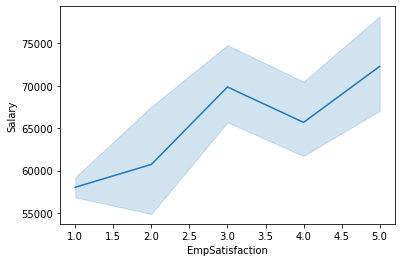

In [224]:
sns.lineplot(x='EmpSatisfaction',y='Salary',data=hr_df)

**OBSERVATION**

Highly satisfied employee gets more salary

<h2 align=center>RecruitmentSource</h2>

**To find best recruitment source**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'LinkedIn'),
  Text(1, 0, 'Indeed'),
  Text(2, 0, 'Google Search'),
  Text(3, 0, 'Employee Referral'),
  Text(4, 0, 'Diversity Job Fair'),
  Text(5, 0, 'On-line Web application'),
  Text(6, 0, 'CareerBuilder'),
  Text(7, 0, 'Website'),
  Text(8, 0, 'Other')])

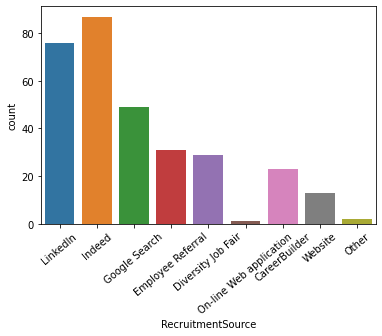

In [225]:
sns.countplot(x=hr_df.RecruitmentSource,data=hr_df)
plt.xticks(rotation=40)

**OBSERVATION**

Indeed is best source for recruitment

**HR Dataset CONCLUSION**

Female employees are more. Though Production department is bigger , employees working in this department is getting lower salary when compared to other departments. Voluntarily Terminated Employees gets less salary, hence less salary might be one of the reason for their resignation. Most of the employees performance is "Fully Meets" and highly satisfied employees performance is good. Though employees in Executive Office department gets more salary they are the most unsatisfied employees. Highly satisfied employee gets more salary and best source for recruitment is Indeed.